In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.express as px
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

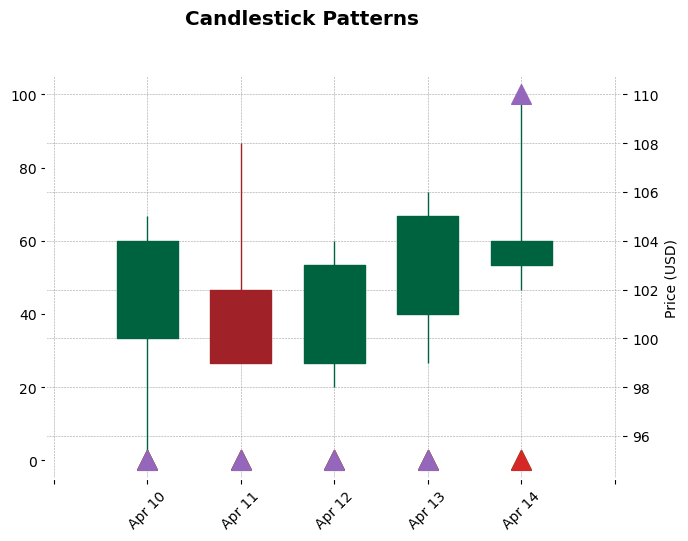

In [2]:
# Sample data: Date, Open, High, Low, Close
data = {
    'Date': pd.to_datetime(['2023-04-10', '2023-04-11', '2023-04-12', '2023-04-13', '2023-04-14']),
    'Open': [100, 102, 99, 101, 103],
    'High': [105, 108, 104, 106, 110],
    'Low': [95, 100, 98, 99, 102],
    'Close': [104, 99, 103, 105, 104]
}

df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Define the market pattern
patterns = {
    'Bullish Engulfing': ((df['Open'][1] > df['Close'][1]) & (df['Open'][2] < df['Close'][2]) & 
                          (df['Open'][1] > df['Close'][2]) & (df['Close'][1] < df['Open'][2])),
    'Bearish Engulfing': ((df['Open'][1] < df['Close'][1]) & (df['Open'][2] > df['Close'][2]) &
                          (df['Open'][1] < df['Close'][2]) & (df['Close'][1] > df['Open'][2])),
    'Doji': (abs(df['Open'] - df['Close']) < (df['High'] - df['Low']) * 0.05),
    'Hammer': ((df['Close'] - df['Low']) > (df['High'] - df['Low']) * 0.7) & 
              (abs(df['Open'] - df['Close']) < (df['High'] - df['Low']) * 0.3),
    'Shooting Star': ((df['High'] - df['Open']) > (df['High'] - df['Low']) * 0.7) & 
                     (abs(df['Open'] - df['Close']) < (df['High'] - df['Low']) * 0.3)
}

# Add a column for patterns
for pattern, condition in patterns.items():
    df[pattern] = condition

# Visualize the data
apdict = mpf.make_addplot(df[['Bullish Engulfing', 'Bearish Engulfing', 'Doji', 'Hammer', 'Shooting Star']]*100,
                          type='scatter', markersize=200, marker='^')

mpf.plot(df, type='candle', style='charles', addplot=apdict,
         title='Candlestick Patterns', ylabel='Price (USD)')

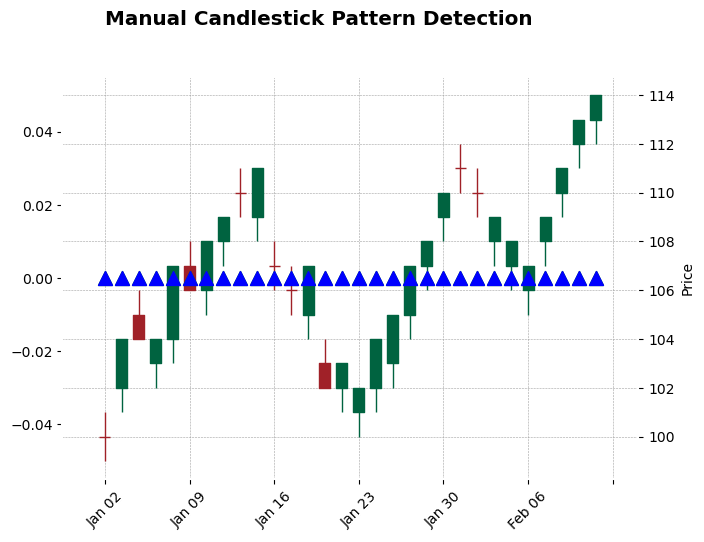

In [3]:
# Example data
dates = pd.date_range(start='2023-01-01', periods=30, freq='B')
data = {
    'Open': [100, 102, 105, 103, 104, 107, 106, 108, 110, 109, 107, 106, 105, 103, 102, 101, 102, 103, 105, 107, 109, 111, 110, 108, 107, 106, 108, 110, 112, 113],
    'High': [101, 103, 106, 104, 105, 108, 107, 109, 111, 110, 108, 107, 106, 104, 103, 102, 103, 104, 106, 108, 110, 112, 111, 109, 108, 107, 109, 111, 113, 114],
    'Low': [99, 101, 104, 102, 103, 106, 105, 107, 109, 108, 106, 105, 104, 102, 101, 100, 101, 102, 104, 106, 108, 110, 109, 107, 106, 105, 107, 109, 111, 112],
    'Close': [100, 104, 104, 104, 107, 106, 108, 109, 110, 111, 107, 106, 107, 102, 103, 102, 104, 105, 107, 108, 110, 111, 110, 109, 108, 107, 109, 111, 113, 114]
}

df = pd.DataFrame(data, index=dates)

# Add Bullish Engulfing and Hammer pattern detection
df['Bullish Engulfing'] = ((df['Close'].shift(1) < df['Open'].shift(1)) & 
                          (df['Open'] < df['Close']) &
                          (df['Open'] < df['Close'].shift(1)) & 
                          (df['Close'] > df['Open'].shift(1)))

df['Hammer'] = ((df['Close'] > df['Open']) & 
                ((df['High'] - df['Low']) > 3 * (df['Close'] - df['Open'])) &
                ((df['Low'] - df['Open']) < 0.2 * (df['High'] - df['Low'])))

# Plot the data with patterns highlighted
addplots = [
    mpf.make_addplot(df['Bullish Engulfing'], type='scatter', markersize=100, marker='^', color='green'),
    mpf.make_addplot(df['Hammer'], type='scatter', markersize=100, marker='^', color='blue')
]

mpf.plot(df, type='candle', style='charles', addplot=addplots, title='Manual Candlestick Pattern Detection')

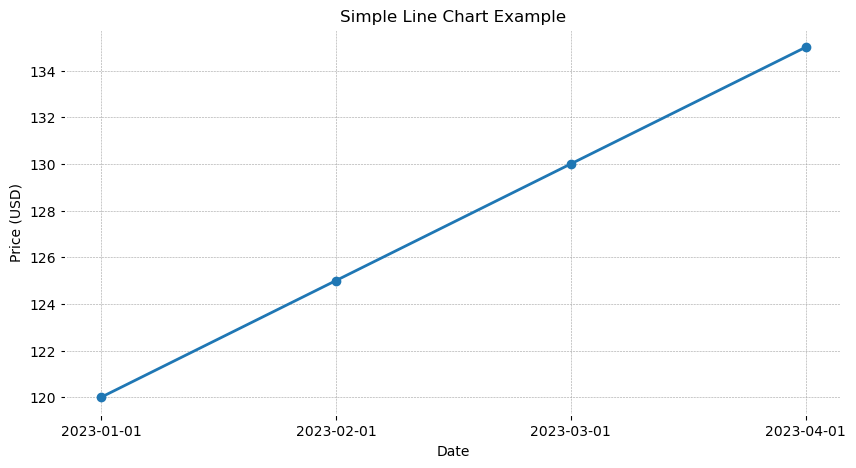

In [4]:
# Sample data
dates = ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01']
prices = [120, 125, 130, 135]

plt.figure(figsize=(10, 5))
plt.plot(dates, prices, marker='o', linestyle='-')
plt.title('Simple Line Chart Example')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

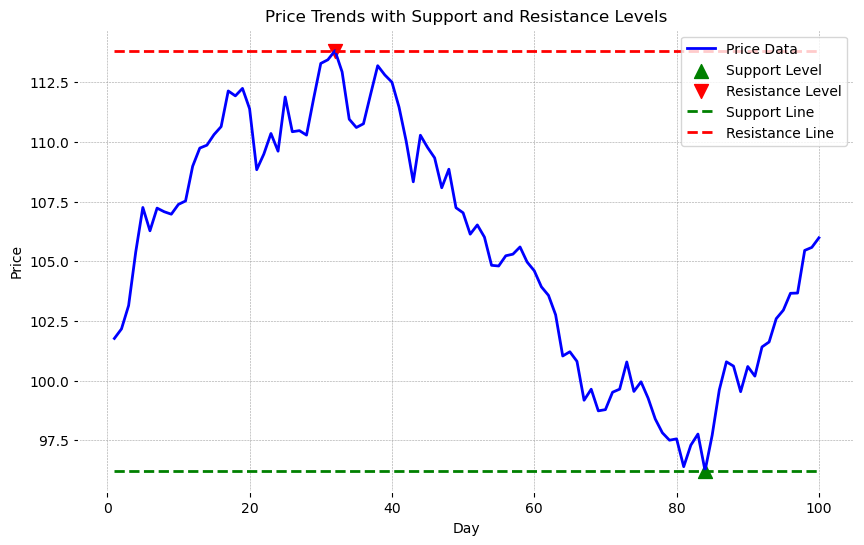

In [5]:
# Simulated price data
np.random.seed(0)
days = np.arange(1, 101)
prices = np.cumsum(np.random.randn(100)) + 100  # Random walk model

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the price data
ax.plot(days, prices, label='Price Data', color='blue')

# Identifying support and resistance levels
support_level = np.min(prices)
resistance_level = np.max(prices)
support_days = days[prices == support_level]
resistance_days = days[prices == resistance_level]

# Highlighting support and resistance
ax.scatter(support_days, [support_level]*len(support_days), color='green', marker='^', s=100, label='Support Level')
ax.scatter(resistance_days, [resistance_level]*len(resistance_days), color='red', marker='v', s=100, label='Resistance Level')

# Drawing horizontal lines for support and resistance
ax.hlines(support_level, xmin=days[0], xmax=days[-1], colors='green', linestyles='dashed', label='Support Line')
ax.hlines(resistance_level, xmin=days[0], xmax=days[-1], colors='red', linestyles='dashed', label='Resistance Line')

# Adding labels and legend
ax.set_xlabel('Day')
ax.set_ylabel('Price')
ax.set_title('Price Trends with Support and Resistance Levels')
ax.legend()

plt.show()

In [6]:
# Sample data: Date and trading volume
data = {
    'Date': pd.to_datetime(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01']),
    'Trading Volume': [1500, 1800, 1600, 2000],
    'Market Sentiment Score': [0.6, 0.8, 0.65, 0.9]
}

df = pd.DataFrame(data)

# Creating an area chart for Trading Volume
fig_volume = px.area(df, x='Date', y='Trading Volume', title='Trading Volume Over Time',
                     labels={'Trading Volume': 'Volume'})
fig_volume.show()

# Creating an area chart for Market Sentiment Score
fig_sentiment = px.area(df, x='Date', y='Market Sentiment Score', title='Market Sentiment Score Over Time',
                        labels={'Market Sentiment Score': 'Sentiment Score'})
fig_sentiment.show()